In [52]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf
import glob

classes = 17

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    return img

# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

def load_train():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

def load_test():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

lx,ly = load_train()
ltx , lty = load_test()

x = np.array(lx)
y = np.array(ly)
ty = np.array(lty)
tx = np.array(ltx)
x = x.astype(float) / 255
tx = tx.astype(float) / 255

In [98]:
def sigmoid(x):
    sig = 1.0/(1+ np.exp(-x))
#     print(sig)
    return sig

def sigmoid_derivative(x):
    sig = 1.0/(1+ np.exp(-x))
    return sig * (1.0 - sig)

In [118]:
class feedForwardNetwork:
    def __init__(self, x, y):
        self.input  = x
        self.w      = np.random.rand(self.input.shape[1],inner) 
        self.v      = np.random.rand(inner,outer)                 
        self.y      = y
        self.output = np.zeros(outer)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input,self.w)/269.15313533645804)
        self.output = sigmoid(np.dot(self.layer1,self.v)/269.15313533645804)
        
    def backPropagation(self):
        self.dv = np.dot(self.layer1.T,(self.y-self.output)*sigmoid_derivative(np.dot(self.layer1,self.v)/269.15313533645804))
        self.dw = np.dot(self.input.T,(np.dot((self.y - self.output) * sigmoid_derivative(np.dot(self.layer1,self.v)/269.15313533645804), self.v.T) * sigmoid_derivative(np.dot(self.input,self.w)/269.15313533645804)))
        
        self.w += self.dw
        self.v += self.dv

In [116]:
sigmoid_derivative(np.dot(nn.layer1,nn.v)/269.15313533645804)

array([[0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049],
       [0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049],
       [0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049],
       ...,
       [0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049],
       [0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049],
       [0.19722755, 0.20246776, 0.19929846, ..., 0.20211492, 0.20150125,
        0.20041049]])

In [103]:
sigmoid_derivative(nn.output)1

array([[0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       ...,
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193]])

In [ ]:
nn = feedForwardNetwork(inp,arr)
# np.dot(nn.input,nn.w).shape
nn.backPropagation()
# sigmoid(np.dot(nn.input,nn.w))
sigmoid_derivative(nn.output).shape

In [5]:
tx.shape

(80, 30, 30)

In [84]:
inp = np.reshape(x,(270,900))
t_inp = np.reshape(tx,(80,900))
inp[2]

array([0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99215686, 0.99607843, 0.98823529, 0.94901961, 0.87843137,
       0.90196078, 0.98431373, 0.99215686, 1.        , 0.99607843,
       0.99607843, 1.        , 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99215686, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99215686, 0.96078431, 0.65882353, 0.43137255,
       0.49411765, 0.84313725, 0.98431373, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843,
       0.99607843, 1.        , 0.99607843, 0.99607843, 0.99215686,
       0.99215686, 0.96862745, 0.67058824, 0.58431373, 0.81568

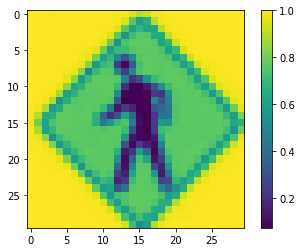

In [24]:
tx.shape
plt.figure()
plt.imshow(np.reshape(inp[0],(30,30)))
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [60]:
arr = np.empty((0,16), float)
for i in range(270):
    k = np.zeros(16)
    k = np.reshape(k,(1,16))
    k[0][y[i]] = 1
#     print(k)
    arr = np.append(arr, k, axis=0)

In [61]:
arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [131]:
inner = 512
outer = 16
nn = feedForwardNetwork(inp,arr)

for i in range(5000):
    print("Epoch: "+str(i))
    nn.feedforward()
    nn.backPropagation()
    if i % 100 == 0:
        print(nn.dw)
        print(nn.dv)
        print(nn.output)
#     print(nn.dw)
#     print(nn.dv)

nn.output

Epoch: 0
[[-27.52603509 -27.32311113 -29.2550382  ... -26.96414655 -42.6212588
  -37.67470105]
 [-27.84105135 -27.61095439 -29.54495404 ... -27.2542842  -43.10186786
  -38.08311756]
 [-28.59780364 -28.34641582 -30.34706065 ... -28.00973866 -44.24373533
  -39.08861805]
 ...
 [-24.75108373 -24.3256101  -26.10387464 ... -24.15100425 -38.19482806
  -33.94167609]
 [-24.82702086 -24.42165904 -26.18009228 ... -24.26770967 -38.34366649
  -34.07820778]
 [-24.68212717 -24.21857234 -26.00730415 ... -24.09954555 -38.06264889
  -33.8474116 ]]
[[-24.83997646 -25.53766352 -25.15709341 ... -25.66352852 -25.86173188
  -25.41189502]
 [-24.75460768 -25.45961025 -25.07218975 ... -25.57456389 -25.77515817
  -25.32818169]
 [-24.93581637 -25.6439078  -25.26015881 ... -25.7682827  -25.96944624
  -25.51563321]
 ...
 [-24.62057115 -25.30003918 -24.92665627 ... -25.42723783 -25.62841771
  -25.18369172]
 [-24.89795291 -25.61304093 -25.22311671 ... -25.72616429 -25.92739095
  -25.47119899]
 [-24.75799348 -25.46583

Epoch: 303
Epoch: 304
Epoch: 305
Epoch: 306
Epoch: 307
Epoch: 308
Epoch: 309
Epoch: 310
Epoch: 311
Epoch: 312
Epoch: 313
Epoch: 314
Epoch: 315
Epoch: 316
Epoch: 317
Epoch: 318
Epoch: 319
Epoch: 320
Epoch: 321
Epoch: 322
Epoch: 323
Epoch: 324
Epoch: 325
Epoch: 326
Epoch: 327
Epoch: 328
Epoch: 329
Epoch: 330
Epoch: 331
Epoch: 332
Epoch: 333
Epoch: 334
Epoch: 335
Epoch: 336
Epoch: 337
Epoch: 338
Epoch: 339
Epoch: 340
Epoch: 341
Epoch: 342
Epoch: 343
Epoch: 344
Epoch: 345
Epoch: 346
Epoch: 347
Epoch: 348
Epoch: 349
Epoch: 350
Epoch: 351
Epoch: 352
Epoch: 353
Epoch: 354
Epoch: 355
Epoch: 356
Epoch: 357
Epoch: 358
Epoch: 359
Epoch: 360
Epoch: 361
Epoch: 362
Epoch: 363
Epoch: 364
Epoch: 365
Epoch: 366
Epoch: 367
Epoch: 368
Epoch: 369
Epoch: 370
Epoch: 371
Epoch: 372
Epoch: 373
Epoch: 374
Epoch: 375
Epoch: 376
Epoch: 377
Epoch: 378
Epoch: 379
Epoch: 380
Epoch: 381
Epoch: 382
Epoch: 383
Epoch: 384
Epoch: 385
Epoch: 386
Epoch: 387
Epoch: 388
Epoch: 389
Epoch: 390
Epoch: 391
Epoch: 392
Epoch: 393

Epoch: 659
Epoch: 660
Epoch: 661
Epoch: 662
Epoch: 663
Epoch: 664
Epoch: 665
Epoch: 666
Epoch: 667
Epoch: 668
Epoch: 669
Epoch: 670
Epoch: 671
Epoch: 672
Epoch: 673
Epoch: 674
Epoch: 675
Epoch: 676
Epoch: 677
Epoch: 678
Epoch: 679
Epoch: 680
Epoch: 681
Epoch: 682
Epoch: 683
Epoch: 684
Epoch: 685
Epoch: 686
Epoch: 687
Epoch: 688
Epoch: 689
Epoch: 690
Epoch: 691
Epoch: 692
Epoch: 693
Epoch: 694
Epoch: 695
Epoch: 696
Epoch: 697
Epoch: 698
Epoch: 699
Epoch: 700
[[2.24674664e-08 3.08381829e-08 6.44238112e-09 ... 3.57956248e-08
  1.51348359e-13 6.65300161e-12]
 [2.32359325e-08 3.18750332e-08 6.64300932e-09 ... 3.70751503e-08
  1.53544110e-13 6.76765463e-12]
 [2.13488952e-08 2.92789293e-08 6.10333891e-09 ... 3.40531527e-08
  1.42278500e-13 6.25406926e-12]
 ...
 [1.54143548e-08 2.13140190e-08 4.41195379e-09 ... 2.46503155e-08
  1.01058772e-13 4.48331774e-12]
 [1.56624732e-08 2.16082592e-08 4.50022216e-09 ... 2.49862754e-08
  1.06674036e-13 4.68479440e-12]
 [1.52118756e-08 2.09993334e-08 4.3696

Epoch: 1003
Epoch: 1004
Epoch: 1005
Epoch: 1006
Epoch: 1007
Epoch: 1008
Epoch: 1009
Epoch: 1010
Epoch: 1011
Epoch: 1012
Epoch: 1013
Epoch: 1014
Epoch: 1015
Epoch: 1016
Epoch: 1017
Epoch: 1018
Epoch: 1019
Epoch: 1020
Epoch: 1021
Epoch: 1022
Epoch: 1023
Epoch: 1024
Epoch: 1025
Epoch: 1026
Epoch: 1027
Epoch: 1028
Epoch: 1029
Epoch: 1030
Epoch: 1031
Epoch: 1032
Epoch: 1033
Epoch: 1034
Epoch: 1035
Epoch: 1036
Epoch: 1037
Epoch: 1038
Epoch: 1039
Epoch: 1040
Epoch: 1041
Epoch: 1042
Epoch: 1043
Epoch: 1044
Epoch: 1045
Epoch: 1046
Epoch: 1047
Epoch: 1048
Epoch: 1049
Epoch: 1050
Epoch: 1051
Epoch: 1052
Epoch: 1053
Epoch: 1054
Epoch: 1055
Epoch: 1056
Epoch: 1057
Epoch: 1058
Epoch: 1059
Epoch: 1060
Epoch: 1061
Epoch: 1062
Epoch: 1063
Epoch: 1064
Epoch: 1065
Epoch: 1066
Epoch: 1067
Epoch: 1068
Epoch: 1069
Epoch: 1070
Epoch: 1071
Epoch: 1072
Epoch: 1073
Epoch: 1074
Epoch: 1075
Epoch: 1076
Epoch: 1077
Epoch: 1078
Epoch: 1079
Epoch: 1080
Epoch: 1081
Epoch: 1082
Epoch: 1083
Epoch: 1084
Epoch: 1085
Epoc

Epoch: 1332
Epoch: 1333
Epoch: 1334
Epoch: 1335
Epoch: 1336
Epoch: 1337
Epoch: 1338
Epoch: 1339
Epoch: 1340
Epoch: 1341
Epoch: 1342
Epoch: 1343
Epoch: 1344
Epoch: 1345
Epoch: 1346
Epoch: 1347
Epoch: 1348
Epoch: 1349
Epoch: 1350
Epoch: 1351
Epoch: 1352
Epoch: 1353
Epoch: 1354
Epoch: 1355
Epoch: 1356
Epoch: 1357
Epoch: 1358
Epoch: 1359
Epoch: 1360
Epoch: 1361
Epoch: 1362
Epoch: 1363
Epoch: 1364
Epoch: 1365
Epoch: 1366
Epoch: 1367
Epoch: 1368
Epoch: 1369
Epoch: 1370
Epoch: 1371
Epoch: 1372
Epoch: 1373
Epoch: 1374
Epoch: 1375
Epoch: 1376
Epoch: 1377
Epoch: 1378
Epoch: 1379
Epoch: 1380
Epoch: 1381
Epoch: 1382
Epoch: 1383
Epoch: 1384
Epoch: 1385
Epoch: 1386
Epoch: 1387
Epoch: 1388
Epoch: 1389
Epoch: 1390
Epoch: 1391
Epoch: 1392
Epoch: 1393
Epoch: 1394
Epoch: 1395
Epoch: 1396
Epoch: 1397
Epoch: 1398
Epoch: 1399
Epoch: 1400
[[2.24679014e-08 3.08389992e-08 6.44241731e-09 ... 3.57967233e-08
  1.51348359e-13 6.65300165e-12]
 [2.32363820e-08 3.18758761e-08 6.64304660e-09 ... 3.70762868e-08
  1.535

Epoch: 1658
Epoch: 1659
Epoch: 1660
Epoch: 1661
Epoch: 1662
Epoch: 1663
Epoch: 1664
Epoch: 1665
Epoch: 1666
Epoch: 1667
Epoch: 1668
Epoch: 1669
Epoch: 1670
Epoch: 1671
Epoch: 1672
Epoch: 1673
Epoch: 1674
Epoch: 1675
Epoch: 1676
Epoch: 1677
Epoch: 1678
Epoch: 1679
Epoch: 1680
Epoch: 1681
Epoch: 1682
Epoch: 1683
Epoch: 1684
Epoch: 1685
Epoch: 1686
Epoch: 1687
Epoch: 1688
Epoch: 1689
Epoch: 1690
Epoch: 1691
Epoch: 1692
Epoch: 1693
Epoch: 1694
Epoch: 1695
Epoch: 1696
Epoch: 1697
Epoch: 1698
Epoch: 1699
Epoch: 1700
[[2.24680878e-08 3.08393491e-08 6.44243282e-09 ... 3.57971941e-08
  1.51348359e-13 6.65300167e-12]
 [2.32365746e-08 3.18762374e-08 6.64306258e-09 ... 3.70767739e-08
  1.53544110e-13 6.76765469e-12]
 [2.13494858e-08 2.92800365e-08 6.10338789e-09 ... 3.40546456e-08
  1.42278500e-13 6.25406931e-12]
 ...
 [1.54147809e-08 2.13148254e-08 4.41198917e-09 ... 2.46513960e-08
  1.01058772e-13 4.48331778e-12]
 [1.56629071e-08 2.16090782e-08 4.50025832e-09 ... 2.49873725e-08
  1.06674036e-13 

Epoch: 1986
Epoch: 1987
Epoch: 1988
Epoch: 1989
Epoch: 1990
Epoch: 1991
Epoch: 1992
Epoch: 1993
Epoch: 1994
Epoch: 1995
Epoch: 1996
Epoch: 1997
Epoch: 1998
Epoch: 1999
Epoch: 2000
[[2.24682743e-08 3.08396990e-08 6.44244833e-09 ... 3.57976649e-08
  1.51348359e-13 6.65300168e-12]
 [2.32367672e-08 3.18765986e-08 6.64307855e-09 ... 3.70772611e-08
  1.53544110e-13 6.76765471e-12]
 [2.13496629e-08 2.92803687e-08 6.10340258e-09 ... 3.40550935e-08
  1.42278500e-13 6.25406933e-12]
 ...
 [1.54149088e-08 2.13150674e-08 4.41199979e-09 ... 2.46517201e-08
  1.01058772e-13 4.48331779e-12]
 [1.56630372e-08 2.16093239e-08 4.50026917e-09 ... 2.49877017e-08
  1.06674036e-13 4.68479445e-12]
 [1.52124232e-08 2.10003679e-08 4.36972184e-09 ... 2.42793708e-08
  1.03013982e-13 4.53263192e-12]]
[[-2.67548320e-10  1.12357106e-11 -2.62632220e-10 ... -2.60190548e-10
  -2.67541952e-10 -2.67543997e-10]
 [-3.66610051e-10  1.95999409e-11 -3.59821513e-10 ... -3.56334576e-10
  -3.66600275e-10 -3.66603380e-10]
 [-7.73231

Epoch: 2305
Epoch: 2306
Epoch: 2307
Epoch: 2308
Epoch: 2309
Epoch: 2310
Epoch: 2311
Epoch: 2312
Epoch: 2313
Epoch: 2314
Epoch: 2315
Epoch: 2316
Epoch: 2317
Epoch: 2318
Epoch: 2319
Epoch: 2320
Epoch: 2321
Epoch: 2322
Epoch: 2323
Epoch: 2324
Epoch: 2325
Epoch: 2326
Epoch: 2327
Epoch: 2328
Epoch: 2329
Epoch: 2330
Epoch: 2331
Epoch: 2332
Epoch: 2333
Epoch: 2334
Epoch: 2335
Epoch: 2336
Epoch: 2337
Epoch: 2338
Epoch: 2339
Epoch: 2340
Epoch: 2341
Epoch: 2342
Epoch: 2343
Epoch: 2344
Epoch: 2345
Epoch: 2346
Epoch: 2347
Epoch: 2348
Epoch: 2349
Epoch: 2350
Epoch: 2351
Epoch: 2352
Epoch: 2353
Epoch: 2354
Epoch: 2355
Epoch: 2356
Epoch: 2357
Epoch: 2358
Epoch: 2359
Epoch: 2360
Epoch: 2361
Epoch: 2362
Epoch: 2363
Epoch: 2364
Epoch: 2365
Epoch: 2366
Epoch: 2367
Epoch: 2368
Epoch: 2369
Epoch: 2370
Epoch: 2371
Epoch: 2372
Epoch: 2373
Epoch: 2374
Epoch: 2375
Epoch: 2376
Epoch: 2377
Epoch: 2378
Epoch: 2379
Epoch: 2380
Epoch: 2381
Epoch: 2382
Epoch: 2383
Epoch: 2384
Epoch: 2385
Epoch: 2386
Epoch: 2387
Epoc

Epoch: 2634
Epoch: 2635
Epoch: 2636
Epoch: 2637
Epoch: 2638
Epoch: 2639
Epoch: 2640
Epoch: 2641
Epoch: 2642
Epoch: 2643
Epoch: 2644
Epoch: 2645
Epoch: 2646
Epoch: 2647
Epoch: 2648
Epoch: 2649
Epoch: 2650
Epoch: 2651
Epoch: 2652
Epoch: 2653
Epoch: 2654
Epoch: 2655
Epoch: 2656
Epoch: 2657
Epoch: 2658
Epoch: 2659
Epoch: 2660
Epoch: 2661
Epoch: 2662
Epoch: 2663
Epoch: 2664
Epoch: 2665
Epoch: 2666
Epoch: 2667
Epoch: 2668
Epoch: 2669
Epoch: 2670
Epoch: 2671
Epoch: 2672
Epoch: 2673
Epoch: 2674
Epoch: 2675
Epoch: 2676
Epoch: 2677
Epoch: 2678
Epoch: 2679
Epoch: 2680
Epoch: 2681
Epoch: 2682
Epoch: 2683
Epoch: 2684
Epoch: 2685
Epoch: 2686
Epoch: 2687
Epoch: 2688
Epoch: 2689
Epoch: 2690
Epoch: 2691
Epoch: 2692
Epoch: 2693
Epoch: 2694
Epoch: 2695
Epoch: 2696
Epoch: 2697
Epoch: 2698
Epoch: 2699
Epoch: 2700
[[2.24687093e-08 3.08405155e-08 6.44248452e-09 ... 3.57987634e-08
  1.51348359e-13 6.65300172e-12]
 [2.32372167e-08 3.18774416e-08 6.64311583e-09 ... 3.70783977e-08
  1.53544110e-13 6.76765475e-12

Epoch: 2962
Epoch: 2963
Epoch: 2964
Epoch: 2965
Epoch: 2966
Epoch: 2967
Epoch: 2968
Epoch: 2969
Epoch: 2970
Epoch: 2971
Epoch: 2972
Epoch: 2973
Epoch: 2974
Epoch: 2975
Epoch: 2976
Epoch: 2977
Epoch: 2978
Epoch: 2979
Epoch: 2980
Epoch: 2981
Epoch: 2982
Epoch: 2983
Epoch: 2984
Epoch: 2985
Epoch: 2986
Epoch: 2987
Epoch: 2988
Epoch: 2989
Epoch: 2990
Epoch: 2991
Epoch: 2992
Epoch: 2993
Epoch: 2994
Epoch: 2995
Epoch: 2996
Epoch: 2997
Epoch: 2998
Epoch: 2999
Epoch: 3000
[[2.24688957e-08 3.08408654e-08 6.44250003e-09 ... 3.57992343e-08
  1.51348359e-13 6.65300174e-12]
 [2.32374093e-08 3.18778029e-08 6.64313181e-09 ... 3.70788849e-08
  1.53544110e-13 6.76765476e-12]
 [2.13502535e-08 2.92814760e-08 6.10345156e-09 ... 3.40565866e-08
  1.42278500e-13 6.25406938e-12]
 ...
 [1.54153350e-08 2.13158739e-08 4.41203517e-09 ... 2.46528007e-08
  1.01058771e-13 4.48331782e-12]
 [1.56634711e-08 2.16101429e-08 4.50030534e-09 ... 2.49887990e-08
  1.06674036e-13 4.68479449e-12]
 [1.52128445e-08 2.10011637e-08 

Epoch: 3290
Epoch: 3291
Epoch: 3292
Epoch: 3293
Epoch: 3294
Epoch: 3295
Epoch: 3296
Epoch: 3297
Epoch: 3298
Epoch: 3299
Epoch: 3300
[[2.24690822e-08 3.08412153e-08 6.44251554e-09 ... 3.57997051e-08
  1.51348359e-13 6.65300175e-12]
 [2.32376019e-08 3.18781642e-08 6.64314779e-09 ... 3.70793720e-08
  1.53544110e-13 6.76765478e-12]
 [2.13504307e-08 2.92818082e-08 6.10346625e-09 ... 3.40570345e-08
  1.42278500e-13 6.25406940e-12]
 ...
 [1.54154628e-08 2.13161158e-08 4.41204579e-09 ... 2.46531249e-08
  1.01058771e-13 4.48331783e-12]
 [1.56636013e-08 2.16103886e-08 4.50031619e-09 ... 2.49891282e-08
  1.06674036e-13 4.68479450e-12]
 [1.52129709e-08 2.10014024e-08 4.36976747e-09 ... 2.42807566e-08
  1.03013982e-13 4.53263196e-12]]
[[-2.67557973e-10  1.12360643e-11 -2.62641699e-10 ... -2.60199955e-10
  -2.67551605e-10 -2.67553651e-10]
 [-3.66628132e-10  1.96008421e-11 -3.59839263e-10 ... -3.56352187e-10
  -3.66618355e-10 -3.66621461e-10]
 [-7.73239469e-11  3.57639439e-12 -7.61412336e-11 ... -7.5

Epoch: 3603
Epoch: 3604
Epoch: 3605
Epoch: 3606
Epoch: 3607
Epoch: 3608
Epoch: 3609
Epoch: 3610
Epoch: 3611
Epoch: 3612
Epoch: 3613
Epoch: 3614
Epoch: 3615
Epoch: 3616
Epoch: 3617
Epoch: 3618
Epoch: 3619
Epoch: 3620
Epoch: 3621
Epoch: 3622
Epoch: 3623
Epoch: 3624
Epoch: 3625
Epoch: 3626
Epoch: 3627
Epoch: 3628
Epoch: 3629
Epoch: 3630
Epoch: 3631
Epoch: 3632
Epoch: 3633
Epoch: 3634
Epoch: 3635
Epoch: 3636
Epoch: 3637
Epoch: 3638
Epoch: 3639
Epoch: 3640
Epoch: 3641
Epoch: 3642
Epoch: 3643
Epoch: 3644
Epoch: 3645
Epoch: 3646
Epoch: 3647
Epoch: 3648
Epoch: 3649
Epoch: 3650
Epoch: 3651
Epoch: 3652
Epoch: 3653
Epoch: 3654
Epoch: 3655
Epoch: 3656
Epoch: 3657
Epoch: 3658
Epoch: 3659
Epoch: 3660
Epoch: 3661
Epoch: 3662
Epoch: 3663
Epoch: 3664
Epoch: 3665
Epoch: 3666
Epoch: 3667
Epoch: 3668
Epoch: 3669
Epoch: 3670
Epoch: 3671
Epoch: 3672
Epoch: 3673
Epoch: 3674
Epoch: 3675
Epoch: 3676
Epoch: 3677
Epoch: 3678
Epoch: 3679
Epoch: 3680
Epoch: 3681
Epoch: 3682
Epoch: 3683
Epoch: 3684
Epoch: 3685
Epoc

Epoch: 3931
Epoch: 3932
Epoch: 3933
Epoch: 3934
Epoch: 3935
Epoch: 3936
Epoch: 3937
Epoch: 3938
Epoch: 3939
Epoch: 3940
Epoch: 3941
Epoch: 3942
Epoch: 3943
Epoch: 3944
Epoch: 3945
Epoch: 3946
Epoch: 3947
Epoch: 3948
Epoch: 3949
Epoch: 3950
Epoch: 3951
Epoch: 3952
Epoch: 3953
Epoch: 3954
Epoch: 3955
Epoch: 3956
Epoch: 3957
Epoch: 3958
Epoch: 3959
Epoch: 3960
Epoch: 3961
Epoch: 3962
Epoch: 3963
Epoch: 3964
Epoch: 3965
Epoch: 3966
Epoch: 3967
Epoch: 3968
Epoch: 3969
Epoch: 3970
Epoch: 3971
Epoch: 3972
Epoch: 3973
Epoch: 3974
Epoch: 3975
Epoch: 3976
Epoch: 3977
Epoch: 3978
Epoch: 3979
Epoch: 3980
Epoch: 3981
Epoch: 3982
Epoch: 3983
Epoch: 3984
Epoch: 3985
Epoch: 3986
Epoch: 3987
Epoch: 3988
Epoch: 3989
Epoch: 3990
Epoch: 3991
Epoch: 3992
Epoch: 3993
Epoch: 3994
Epoch: 3995
Epoch: 3996
Epoch: 3997
Epoch: 3998
Epoch: 3999
Epoch: 4000
[[2.24695173e-08 3.08420318e-08 6.44255173e-09 ... 3.58008038e-08
  1.51348359e-13 6.65300179e-12]
 [2.32380514e-08 3.18790073e-08 6.64318507e-09 ... 3.70805088

Epoch: 4260
Epoch: 4261
Epoch: 4262
Epoch: 4263
Epoch: 4264
Epoch: 4265
Epoch: 4266
Epoch: 4267
Epoch: 4268
Epoch: 4269
Epoch: 4270
Epoch: 4271
Epoch: 4272
Epoch: 4273
Epoch: 4274
Epoch: 4275
Epoch: 4276
Epoch: 4277
Epoch: 4278
Epoch: 4279
Epoch: 4280
Epoch: 4281
Epoch: 4282
Epoch: 4283
Epoch: 4284
Epoch: 4285
Epoch: 4286
Epoch: 4287
Epoch: 4288
Epoch: 4289
Epoch: 4290
Epoch: 4291
Epoch: 4292
Epoch: 4293
Epoch: 4294
Epoch: 4295
Epoch: 4296
Epoch: 4297
Epoch: 4298
Epoch: 4299
Epoch: 4300
[[2.24697037e-08 3.08423818e-08 6.44256724e-09 ... 3.58012747e-08
  1.51348359e-13 6.65300181e-12]
 [2.32382441e-08 3.18793686e-08 6.64320104e-09 ... 3.70809961e-08
  1.53544110e-13 6.76765483e-12]
 [2.13510213e-08 2.92829156e-08 6.10351523e-09 ... 3.40585278e-08
  1.42278500e-13 6.25406945e-12]
 ...
 [1.54158890e-08 2.13169224e-08 4.41208117e-09 ... 2.46542056e-08
  1.01058771e-13 4.48331787e-12]
 [1.56640352e-08 2.16112077e-08 4.50035235e-09 ... 2.49902257e-08
  1.06674036e-13 4.68479454e-12]
 [1.5213

Epoch: 4589
Epoch: 4590
Epoch: 4591
Epoch: 4592
Epoch: 4593
Epoch: 4594
Epoch: 4595
Epoch: 4596
Epoch: 4597
Epoch: 4598
Epoch: 4599
Epoch: 4600
[[2.24698902e-08 3.08427318e-08 6.44258275e-09 ... 3.58017456e-08
  1.51348359e-13 6.65300182e-12]
 [2.32384367e-08 3.18797300e-08 6.64321702e-09 ... 3.70814833e-08
  1.53544110e-13 6.76765485e-12]
 [2.13511985e-08 2.92832478e-08 6.10352993e-09 ... 3.40589757e-08
  1.42278500e-13 6.25406946e-12]
 ...
 [1.54160169e-08 2.13171644e-08 4.41209179e-09 ... 2.46545298e-08
  1.01058771e-13 4.48331788e-12]
 [1.56641654e-08 2.16114535e-08 4.50036320e-09 ... 2.49905549e-08
  1.06674036e-13 4.68479455e-12]
 [1.52135186e-08 2.10024371e-08 4.36981311e-09 ... 2.42821425e-08
  1.03013982e-13 4.53263201e-12]]
[[-2.67567627e-10  1.12364180e-11 -2.62651178e-10 ... -2.60209363e-10
  -2.67561259e-10 -2.67563305e-10]
 [-3.66646215e-10  1.96017434e-11 -3.59857015e-10 ... -3.56369800e-10
  -3.66636438e-10 -3.66639544e-10]
 [-7.73247565e-11  3.57642737e-12 -7.61420310e

Epoch: 4905
Epoch: 4906
Epoch: 4907
Epoch: 4908
Epoch: 4909
Epoch: 4910
Epoch: 4911
Epoch: 4912
Epoch: 4913
Epoch: 4914
Epoch: 4915
Epoch: 4916
Epoch: 4917
Epoch: 4918
Epoch: 4919
Epoch: 4920
Epoch: 4921
Epoch: 4922
Epoch: 4923
Epoch: 4924
Epoch: 4925
Epoch: 4926
Epoch: 4927
Epoch: 4928
Epoch: 4929
Epoch: 4930
Epoch: 4931
Epoch: 4932
Epoch: 4933
Epoch: 4934
Epoch: 4935
Epoch: 4936
Epoch: 4937
Epoch: 4938
Epoch: 4939
Epoch: 4940
Epoch: 4941
Epoch: 4942
Epoch: 4943
Epoch: 4944
Epoch: 4945
Epoch: 4946
Epoch: 4947
Epoch: 4948
Epoch: 4949
Epoch: 4950
Epoch: 4951
Epoch: 4952
Epoch: 4953
Epoch: 4954
Epoch: 4955
Epoch: 4956
Epoch: 4957
Epoch: 4958
Epoch: 4959
Epoch: 4960
Epoch: 4961
Epoch: 4962
Epoch: 4963
Epoch: 4964
Epoch: 4965
Epoch: 4966
Epoch: 4967
Epoch: 4968
Epoch: 4969
Epoch: 4970
Epoch: 4971
Epoch: 4972
Epoch: 4973
Epoch: 4974
Epoch: 4975
Epoch: 4976
Epoch: 4977
Epoch: 4978
Epoch: 4979
Epoch: 4980
Epoch: 4981
Epoch: 4982
Epoch: 4983
Epoch: 4984
Epoch: 4985
Epoch: 4986
Epoch: 4987
Epoc

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [124]:
nn.feedforward(t_inp[10],arr[10])

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [89]:
arr[140]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
sigmoid(np.dot(sigmoid(np.dot(t_inp[0],nn.w)),nn.v))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [62]:
inner = 5
outer = 2
X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
Y = np.array([[0,0],[0,1],[1,0],[1,1]])
tmp = feedForwardNetwork(X,Y)

for i in range(1500):
    tmp.feedforward()
    tmp.backPropagation()


tmp.output

array([[0.01618388, 0.01935707],
       [0.01727665, 0.98397978],
       [0.98182049, 0.01873056],
       [0.98731539, 0.98590599]])

In [57]:
tmp.output.shape

(4, 16)

In [52]:
dw

0

In [48]:
dw = 0
dv = 0

In [26]:
np.reshape(k,(2,1,6))

array([[[0, 1, 2, 3, 4, 5]],

       [[0, 1, 2, 3, 4, 5]]])

In [10]:
a = feedForwardNetwork(5,10)

In [20]:
input = np.array([[1,2,3],[2,1,3]])

In [31]:
input.shape

(2, 3)

In [40]:
w = np.random.rand(3,2)

In [46]:
w = np.array([[1,0],[0,1],[1,1]])

In [47]:
w

array([[1, 0],
       [0, 1],
       [1, 1]])

In [66]:
l1

array([[4, 5],
       [5, 4]])

In [128]:
t_inp[0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99215686, 0.96470588, 0.91372549,
       0.90588235, 0.92156863, 0.96862745, 0.99215686, 1.        ,
       1.        , 0.99607843, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99607843, 0.98823529, 0.90980392, 0.85098039,
       0.83529412, 0.78823529, 0.89803922, 0.97647059, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 0.98823529, 0.95686275, 0.84313725, 0.49411

In [129]:
nn.feedforward(t_inp[0],arr[0])

TypeError: feedforward() takes 1 positional argument but 3 were given

In [71]:
np.dot(l1.T,[1,2])

array([14, 13])

In [65]:
d

array([[20, 25],
       [25, 20]])

In [57]:
a = np.array([[1,2],[1,2]]) 
b = np.array([[11,12,2],[13,14,1]]) 
np.dot(a,b)

array([[37, 40,  4],
       [37, 40,  4]])